
 Accuracy: 0.9820627802690582

 Confusion Matrix:
 [[952  14]
 [  6 143]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.91      0.96      0.93       149

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



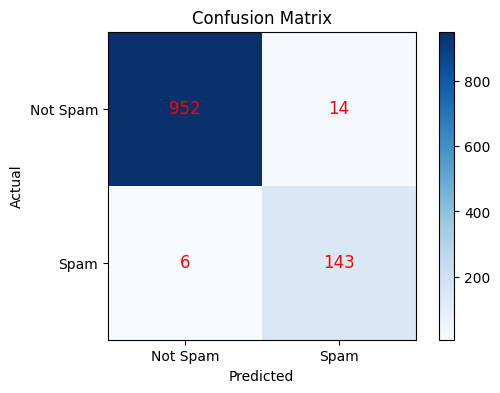

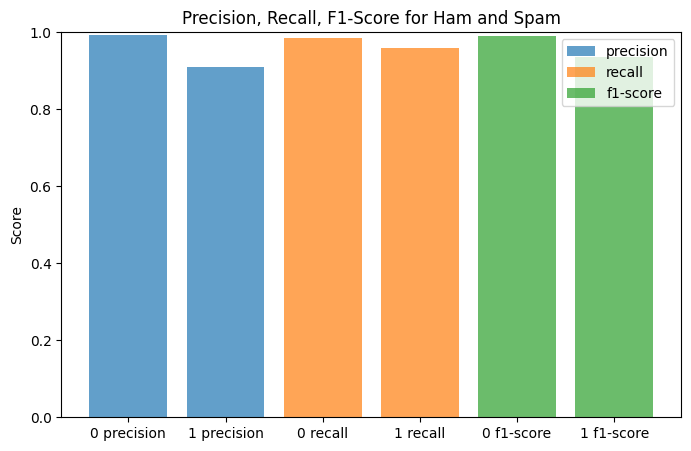


 Sample Predictions

Message: Congratulations! You won a free ticket to Bahamas! Call now to claim.
Predicted: SPAM

Message: Hey, what time are we meeting for lunch tomorrow?
Predicted: NOT SPAM


In [5]:
# ============================================
# Bayesian Decision Theory: SMS Spam Detection (with Graphs)
# ============================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ===============================
# Step 1: Load Dataset
# ===============================
df = pd.read_csv("spam.csv", sep='\t', encoding='latin-1', names=['label', 'message'])

# Convert labels: ham → 0, spam → 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# ===============================
# Step 2: Preprocessing
# ===============================
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']

# ===============================
# Step 3: Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# Step 4: Model Training
# ===============================
model = MultinomialNB()
model.fit(X_train, y_train)

# ===============================
# Step 5: Model Evaluation
# ===============================
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print("\n Accuracy:", acc)
print("\n Confusion Matrix:\n", cm)
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# ===============================
# Step 6: Visualization
# ===============================

# --- Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Not Spam', 'Spam'])
plt.yticks([0, 1], ['Not Spam', 'Spam'])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=12)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# --- Precision, Recall, F1-score Bar Charts ---
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']  # 0 = ham, 1 = spam

plt.figure(figsize=(8, 5))
for metric in metrics:
    values = [report[cls][metric] for cls in classes]
    plt.bar([f"{cls} {metric}" for cls in classes], values, alpha=0.7, label=metric)

plt.ylim(0, 1)
plt.title("Precision, Recall, F1-Score for Ham and Spam")
plt.ylabel("Score")
plt.legend()
plt.show()

# ===============================
# Step 7: Sample Predictions
# ===============================
sample_messages = [
    "Congratulations! You won a free ticket to Bahamas! Call now to claim.",
    "Hey, what time are we meeting for lunch tomorrow?"
]

sample_features = vectorizer.transform(sample_messages)
sample_preds = model.predict(sample_features)

print("\n=====================")
print(" Sample Predictions")
print("=====================")
for msg, pred in zip(sample_messages, sample_preds):
    print(f"\nMessage: {msg}\nPredicted: {'SPAM' if pred == 1 else 'NOT SPAM'}")
